In [1]:
# Loading the dataset using pandas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('customer_shopping_behavior.csv')

In [2]:
# Standardize column names for analysis
df.columns = (
    df.columns
      .str.lower()
      .str.replace(' ', '_')
      .str.replace('(usd)', 'usd', regex=False)
)

In [3]:
df.head()

,customer_id,age,gender,item_purchased,category,purchase_amount_usd,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             3900 non-null   int64  
 1   age                     3900 non-null   int64  
 2   gender                  3900 non-null   object 
 3   item_purchased          3900 non-null   object 
 4   category                3900 non-null   object 
 5   purchase_amount_usd     3900 non-null   int64  
 6   location                3900 non-null   object 
 7   size                    3900 non-null   object 
 8   color                   3900 non-null   object 
 9   season                  3900 non-null   object 
 10  review_rating           3863 non-null   float64
 11  subscription_status     3900 non-null   object 
 12  shipping_type           3900 non-null   object 
 13  discount_applied        3900 non-null   object 
 14  promo_code_used         3900 non-null   

In [5]:
# Summary statistics using .describe()
df.describe(include='all')

,customer_id,age,gender,item_purchased,category,purchase_amount_usd,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3863.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.750065,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716983,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [6]:
# Customer-level aggregation
customer_df = (
    df.groupby('customer_id')
      .agg(
          total_spend=('purchase_amount_usd', 'sum'),
          avg_spend=('purchase_amount_usd', 'mean'),
          total_orders=('purchase_amount_usd', 'count'),
          avg_rating=('review_rating', 'mean'),
          previous_purchases=('previous_purchases', 'max'),
          subscription=('subscription_status', 'first')
      )
      .reset_index()
)

customer_df.head()

,customer_id,total_spend,avg_spend,total_orders,avg_rating,previous_purchases,subscription
0,1,53,53.0,1,3.1,14,Yes
1,2,64,64.0,1,3.1,2,Yes
2,3,73,73.0,1,3.1,23,Yes
3,4,90,90.0,1,3.5,49,Yes
4,5,49,49.0,1,2.7,31,Yes


In [7]:
# High-value customer segmentation
customer_df['value_segment'] = pd.qcut(
    customer_df['total_spend'],
    q=4,
    labels=['Low', 'Mid', 'High', 'Very High']
)

customer_df['value_segment'].value_counts()

Low          1014
High          988
Mid           972
Very High     926
Name: value_segment, dtype: int64

In [8]:
# Revenue concentration (Pareto analysis)
top_20_pct = customer_df.sort_values(
    'total_spend', ascending=False
).head(int(0.2 * len(customer_df)))

top_20_pct['total_spend'].sum() / customer_df['total_spend'].sum()

0.3099437534590979

In [9]:
# Checking if missing data or null values are present in the dataset

df.isnull().sum()

customer_id                0
age                        0
gender                     0
item_purchased             0
category                   0
purchase_amount_usd        0
location                   0
size                       0
color                      0
season                     0
review_rating             37
subscription_status        0
shipping_type              0
discount_applied           0
promo_code_used            0
previous_purchases         0
payment_method             0
frequency_of_purchases     0
dtype: int64

In [10]:
# Impute missing review ratings using category-wise median
df['review_rating'] = (
    df.groupby('category')['review_rating']
      .transform(lambda x: x.fillna(x.median()))
)

In [11]:
df.isnull().sum()

customer_id               0
age                       0
gender                    0
item_purchased            0
category                  0
purchase_amount_usd       0
location                  0
size                      0
color                     0
season                    0
review_rating             0
subscription_status       0
shipping_type             0
discount_applied          0
promo_code_used           0
previous_purchases        0
payment_method            0
frequency_of_purchases    0
dtype: int64

In [12]:
# Renaming columns according to snake casing for better readability and documentation

df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df = df.rename(columns={'purchase_amount_(usd)':'purchase_amount'})

In [13]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_usd', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

In [14]:
# create a new column age_group
labels = ['Young Adult', 'Adult', 'Middle-aged', 'Senior']
df['age_group'] = pd.qcut(df['age'], q=4, labels = labels)

In [15]:
df[['age','age_group']].head(10)

,age,age_group
0,55,Middle-aged
1,19,Young Adult
2,50,Middle-aged
3,21,Young Adult
4,45,Middle-aged
5,46,Middle-aged
6,63,Senior
7,27,Young Adult
8,26,Young Adult
9,57,Middle-aged


In [16]:
# create new column purchase_frequency_days

frequency_mapping = {
    'Fortnightly': 14,
    'Weekly': 7,
    'Monthly': 30,
    'Quarterly': 90,
    'Bi-Weekly': 14,
    'Annually': 365,
    'Every 3 Months': 90
}

df['purchase_frequency_days'] = df['frequency_of_purchases'].map(frequency_mapping)

In [17]:
df[['purchase_frequency_days','frequency_of_purchases']].head(10)

,purchase_frequency_days,frequency_of_purchases
0,14,Fortnightly
1,14,Fortnightly
2,7,Weekly
3,7,Weekly
4,365,Annually
5,7,Weekly
6,90,Quarterly
7,7,Weekly
8,365,Annually
9,90,Quarterly


In [18]:
df[['discount_applied','promo_code_used']].head(10)

,discount_applied,promo_code_used
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes
5,Yes,Yes
6,Yes,Yes
7,Yes,Yes
8,Yes,Yes
9,Yes,Yes


In [19]:
# Discount effectiveness analysis
df.groupby('discount_applied')['purchase_amount_usd'].mean()

discount_applied
No     60.130454
Yes    59.279070
Name: purchase_amount_usd, dtype: float64

In [20]:
df.groupby('frequency_of_purchases')['purchase_amount_usd'].sum()

frequency_of_purchases
Annually          34419
Bi-Weekly         33200
Every 3 Months    35088
Fortnightly       32007
Monthly           32810
Quarterly         33771
Weekly            31786
Name: purchase_amount_usd, dtype: int64

In [21]:
category_perf = df.groupby('category').agg(
    revenue=('purchase_amount_usd', 'sum'),
    avg_rating=('review_rating', 'mean'),
    orders=('purchase_amount_usd', 'count')
)

category_perf['revenue_share'] = (
    category_perf['revenue'] / category_perf['revenue'].sum()
)

category_perf.sort_values('revenue_share', ascending=False)

,revenue,avg_rating,orders,revenue_share
category,,,,
Clothing,104264,3.721301,1737,0.447329
Accessories,74200,3.770242,1240,0.318344
Footwear,36093,3.793823,599,0.154852
Outerwear,18524,3.745988,324,0.079475


In [22]:
# Seasonal revenue trends
df.groupby('season')['purchase_amount_usd'].sum()


season
Fall      60018
Spring    58679
Summer    55777
Winter    58607
Name: purchase_amount_usd, dtype: int64

Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: frequency_of_purchases, dtype: int64

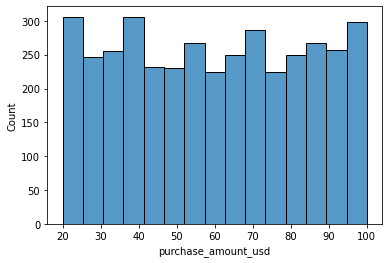

In [23]:
sns.histplot(df['purchase_amount_usd'])
df['frequency_of_purchases'].value_counts()

In [24]:
(df['discount_applied'] == df['promo_code_used']).all()

True

In [25]:
# Dropping promo code used column

df = df.drop('promo_code_used', axis=1)

In [26]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_usd', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'previous_purchases', 'payment_method',
       'frequency_of_purchases', 'age_group', 'purchase_frequency_days'],
      dtype='object')

In [27]:
## Key Insights from Exploratory Data Analysis

- A small percentage of customers contribute a disproportionate share of revenue
- Subscription customers demonstrate higher purchase frequency and spend
- Discounts do not significantly increase average order value
- Certain product categories dominate revenue contribution
- Seasonal patterns influence category-level performance

These insights guide KPI selection and dashboard design in the next phase.

SyntaxError: invalid syntax (3956933224.py, line 3)

## Connecting Python script to PostgreSQL

In [ ]:
!pip install psycopg2-binary sqlalchemy

In [ ]:
# Install required libraries

from sqlalchemy import create_engine
from urllib.parse import quote_plus

# SQL Server connection
username = "sa"
password = "your_password"
host = "localhost"
port = "1433"
database = "customer_behavior"

# Note: requires Microsoft ODBC Driver installed separately on your machine
driver = quote_plus("ODBC Driver 17 for SQL Server")
engine = create_engine(f"mssql+pyodbc://{username}:{password}@{host},{port}/{database}?driver={driver}")

# Write DataFrame to SQL Server
df.to_sql("customer", engine, if_exists="replace", index=False)

# Read back sample (SQL Server uses TOP instead of LIMIT)
pd.read_sql("SELECT TOP 5 * FROM customer;", engine)